# Laboratory Experiment 004: Frequency Response

#### Name: Marvin D. Llames

Analyzing feedforward filter...


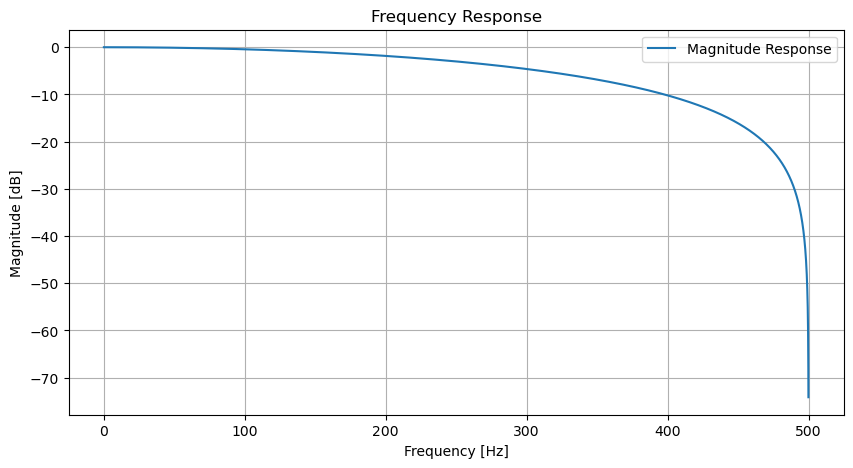

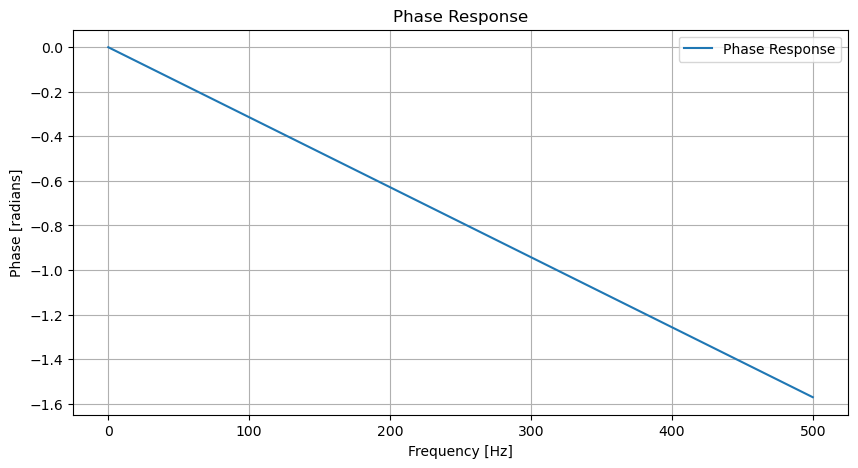

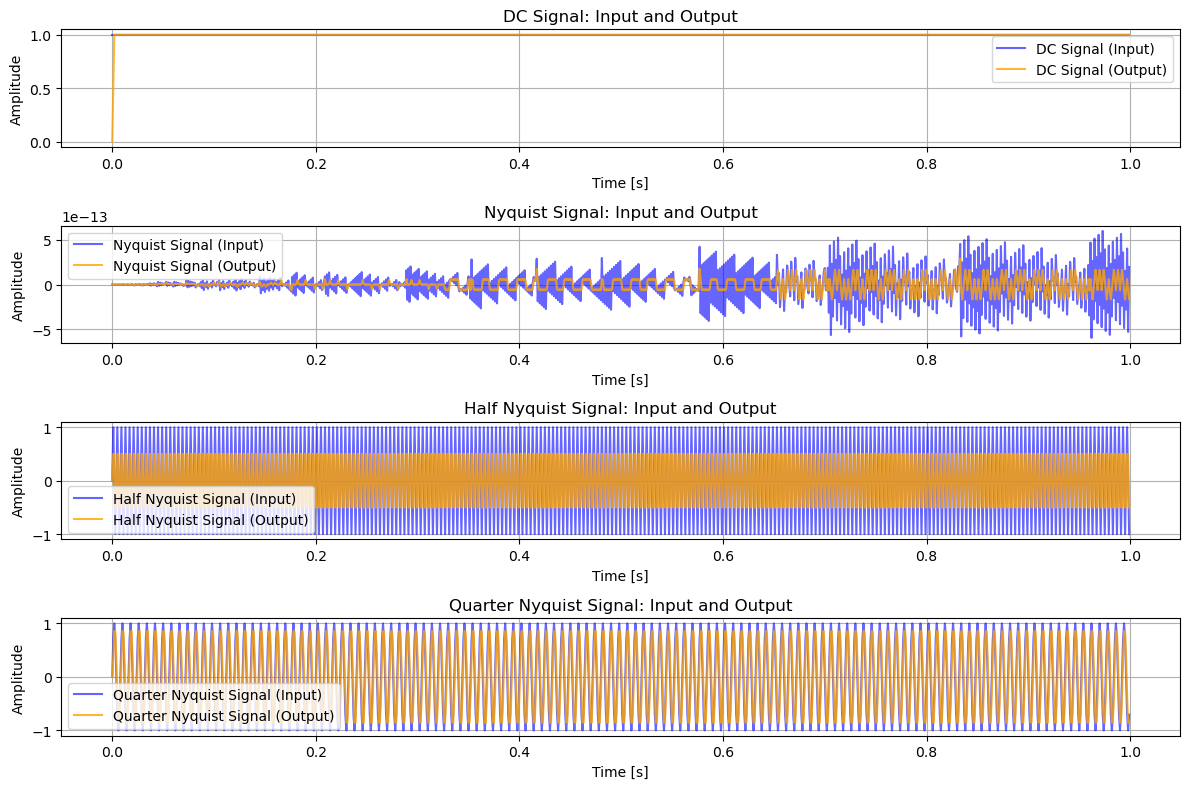

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Define the feedforward filter coefficients
a0 = 0.5
a1 = 0.5
b = [a0, a1]  # Filter coefficients
fs = 1000  # Sampling frequency in Hz

# Test signals
def generate_test_signals(fs, duration=1):
    t = np.arange(0, duration, 1/fs)
    dc_signal = np.ones_like(t)  # DC signal (0 Hz)
    nyquist_signal = np.sin(2 * np.pi * (fs / 2) * t)  # Nyquist frequency signal
    half_nyquist_signal = np.sin(2 * np.pi * (fs / 4) * t)  # 1/2 Nyquist frequency signal
    quarter_nyquist_signal = np.sin(2 * np.pi * (fs / 8) * t)  # 1/4 Nyquist frequency signal
    return t, dc_signal, nyquist_signal, half_nyquist_signal, quarter_nyquist_signal

# Apply feedforward filter
def feedforward_filter(input_signal, a0, a1):
    delay = np.zeros_like(input_signal)
    output = np.zeros_like(input_signal)
    for n in range(1, len(input_signal)):
        output[n] = a0 * input_signal[n] + a1 * delay[n - 1]
        delay[n] = input_signal[n]
    return output

# Frequency response
def plot_frequency_response(b, fs):
    w, h = freqz(b, worN=8000)
    freqs = w / (2 * np.pi) * fs
    plt.figure(figsize=(10, 5))
    plt.plot(freqs, 20 * np.log10(abs(h)), label="Magnitude Response")
    plt.title("Frequency Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude [dB]")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(freqs, np.angle(h), label="Phase Response")
    plt.title("Phase Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid()
    plt.legend()
    plt.show()

# Analyze filter behavior with test signals
def analyze_test_signals():
    t, dc_signal, nyquist_signal, half_nyquist_signal, quarter_nyquist_signal = generate_test_signals(fs)

    # Process signals through the filter
    dc_output = feedforward_filter(dc_signal, a0, a1)
    nyquist_output = feedforward_filter(nyquist_signal, a0, a1)
    half_nyquist_output = feedforward_filter(half_nyquist_signal, a0, a1)
    quarter_nyquist_output = feedforward_filter(quarter_nyquist_signal, a0, a1)

    # Plot results for each signal
    signals = [
        ("DC Signal", dc_signal, dc_output),
        ("Nyquist Signal", nyquist_signal, nyquist_output),
        ("Half Nyquist Signal", half_nyquist_signal, half_nyquist_output),
        ("Quarter Nyquist Signal", quarter_nyquist_signal, quarter_nyquist_output),
    ]

    plt.figure(figsize=(12, 8))
    for i, (label, input_sig, output_sig) in enumerate(signals):
        plt.subplot(4, 1, i + 1)
        plt.plot(t, input_sig, label=f"{label} (Input)", color='blue', alpha=0.6)
        plt.plot(t, output_sig, label=f"{label} (Output)", color='orange', alpha=0.8)
        plt.title(f"{label}: Input and Output")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Analyzing feedforward filter...")
    # Plot frequency and phase responses
    plot_frequency_response(b, fs)
    # Analyze test signals
    analyze_test_signals()